In [56]:
import numpy as np
import matplotlib.pyplot as plt

"""
List with ~100 episodes

Each episode has
'initial_configurations', 'final_configurations', 'action'


initial/final configurations has
'net_position', 'individual_net_position', 'cash_position', 'debts'

"""

configurations = np.load('./evaluation-data.npy',allow_pickle=True)

In [66]:
initial_cash_positions = []
ending_cash_positions = []

initial_individual_net_position = []
ending_individual_net_position = []

for episode in configurations:
    initial_cash_positions.append(episode['initial_configurations']['cash_position'])
    ending_cash_positions.append(episode['final_configurations']['cash_position'])
    
    initial_individual_net_position.append(episode['initial_configurations']['individual_net_position'])
    ending_individual_net_position.append(episode['final_configurations']['individual_net_position'])

In [67]:
max_initial_cash_positions = [np.max(cash_position) for cash_position in initial_cash_positions]
max_ending_cash_positions = [np.max(cash_position) for cash_position in ending_cash_positions]
max_initial_individual_net_position = [np.max(individual_net_position) for individual_net_position in initial_individual_net_position]
max_ending_individual_net_position = [np.max(individual_net_position) for individual_net_position in ending_individual_net_position]

In [72]:
def plot_histogram(parameters):
    plot = plt.hist(parameters['data'])
    plt.xlabel(parameters['xlabel'])
    plt.ylabel(parameters['ylabel'])
    plt.title(parameters['title'])

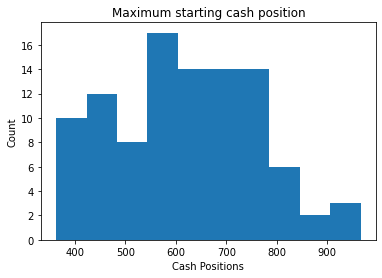

In [74]:
parameters= {'data':max_initial_cash_positions,
            'xlabel':"Cash Positions",
            'ylabel':"Count",
            'title':"Maximum starting cash position"}
plot_histogram(parameters)

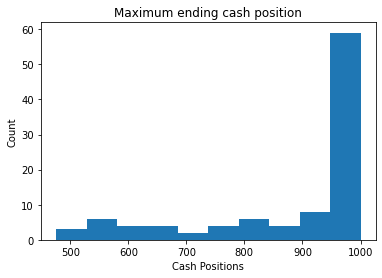

In [76]:
parameters= {'data':max_ending_cash_positions,
            'xlabel':"Cash Positions",
            'ylabel':"Count",
            'title':"Maximum ending cash position"}
plot_histogram(parameters)

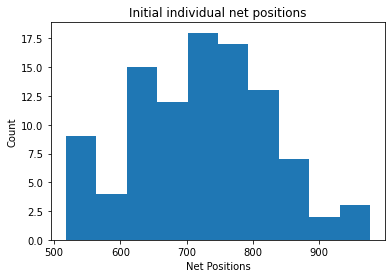

In [77]:
parameters= {'data':max_initial_individual_net_position,
            'xlabel':"Net Positions",
            'ylabel':"Count",
            'title':"Initial individual net positions"}
plot_histogram(parameters)

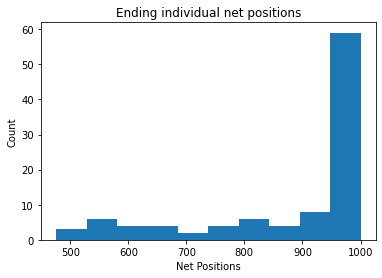

In [78]:
parameters= {'data':max_ending_individual_net_position,
            'xlabel':"Net Positions",
            'ylabel':"Count",
            'title':"Ending individual net positions"}
plot_histogram(parameters)

In [ ]:
# Change in net positions

In [ ]:
# Note the net positions usually consists of one person owning all the wealth.  
# Are there cases where more than 60% owns the bulk of the wealth?